In [ ]:
import random
import numpy as np
from tqdm import tqdm

# Rover
**Monte Carlo Control**

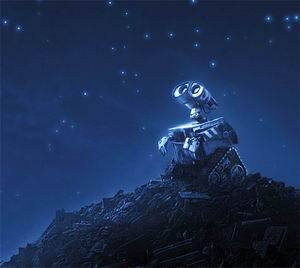

Consider a rover that is trying to move up the hill. The robot has solar powered motors. Once the robot **reaches the top** of the hill, the **episode ends**. The Robot can either be at **low, medium, high or top** of the hill at any given point of time.

The robot can either decide to spin it's wheels **slowly or rapidly** in order to move up on the gradient.

- If the **motor spins the wheel slowly**, with probability `0.6` it moves to the next higher state in one time step, and with probability `0.4`, it slides all the way down the slope to the low state.
- On the other hand, if the **motor spins the wheel rapidly**, with probability `0.9` it moves to the next higher state in one time step, and with probability `0.1`, it slides all the way down the slope to the low state.

The robot initially starts from low state with 10 units of energy (battery charge). The **episode ends** if the batteries get completely discharged or if rover reaches the top position.

The rover has a motor that can spin its wheel
- slowly at the expense of 2 unit of energy per time step;
- or rapidly at the expense of 4 units of energy per time step.

**rover gains 4 units of energy** per time step from its solar panels any time it transitions **upward from the medium position** as it gets exposed to sunlight.

### Goal:
The Robot has to reach the top with maximum amount of energy left in the battery (Energy spent while moving to the top must be minimum)

### Tasks

##### PART 1
- Create an "Environment" class that has the step() method which takes in an action and returns the next state and one step reward.

- Try taking random actions until the eposode terminates. Print the one-step reward, action and next state for all transitions in the episode. What is the average total reward if you run the experiment over many episodes?  

- What is the average total reward over 10,000 episodes if:
    - Actions are chosen "randmoly" from the action space?
    - Action is always "spin_slowly"?  
    - Acion is always "spin_rapidly"?

##### PART 2
- Create an "Agent" class with train() and policy() methods which learns to take actions in this environment. Agent should be trainable using Monte-Carlo Control.

- Train the agent. What is the average total return after training the Agent?

    *(optional)*
- Perform monte-carlo prediction of state-values to evaluate the learned policy. How valuable is it to start from each state?

In [ ]:
INITIAL_CHARGE = 10
INITIAL_STATE = "low"

class RoverEnv:
  """It can be inferred from the problem that:

  State space = {"low", "medium", "high", "top"}
  Action space = {spin_slowly, spin_rapidly}
  Ex. `action = spin_slowly` means the agent took the action spin_slowly.

  Start state
  -----------
  Robot starts low position with 10 units charge.

  Rewards
  -------
  Amount of energy left in the robot when episode ends is the reward.
  the one step-reward is received only once i.e, when the episode ends.

  Terminal conditions
  -------------------
  Episode end is:
  - Robot transitions to the top postion.
  - There is no charge left in the batteries.
  """

  def __init__(self):
    self.action_space = ["spin_slowly", "spin_rapidly"]
    self.observation_space = ["low", "medium", "high", "top"]

    self.reset()

  def reset(self):
    self.state = INITIAL_STATE
    self.charge = INITIAL_CHARGE
    self.terminated = False

    self.total_reward = 0


  def get_transition_probability(self, start_state, end_state, action):

    # probability of moving "up" when motor spins "slowly"
    slow_spin_up_p = 0.6
    # probability of moving "up" when motor spins "rapidly"
    rapid_spin_up_p = 0.9

    # probability of moving "down" when motor spins "slowly"
    slow_spin_down_p = 1-slow_spin_up_p
    # probability of moving "down" when motor spins "rapidly"
    rapid_spin_down_p = 1-rapid_spin_up_p


    if action == "spin_slowly":
      if start_state == "low" and end_state == "medium":
        return slow_spin_up_p
      if start_state == "low" and end_state == "low":
        return slow_spin_down_p
      if start_state == "medium" and end_state == "high":
        return slow_spin_up_p
      if start_state == "medium" and end_state == "low":
        return slow_spin_down_p
      if start_state == "high" and end_state == "top":
        return slow_spin_up_p
      if start_state == "high" and end_state == "low":
        return slow_spin_down_p

    if action == "spin_rapidly":
      # fill code ...
      if start_state == "low" and end_state == "medium":
        return rapid_spin_up_p
      if start_state == "low" and end_state == "low":
        return rapid_spin_up_p
      if start_state == "medium" and end_state == "high":
        return rapid_spin_up_p
      if start_state == "medium" and end_state == "low":
        return rapid_spin_up_p
      if start_state == "high" and end_state == "top":
        return rapid_spin_up_p
      if start_state == "high" and end_state == "low":
        return rapid_spin_up_p


  def get_charge_difference(self, start_state, end_state, action):
    charge_diff = 0

    # discharge due to action taken
    # fill code ...
    if action == "spin_slowly":
      charge_diff -= 2

    # charge gen from solar panels
    # fill code ...
    if start_state == "medium" and end_state == "high":
      charge_diff += 4
    if start_state == "" and end_state == "top":
      charge_diff += 4
    if start_state == "high" and end_state == "top":
      charge_diff += 4
    return charge_diff

  def get_reward(self, end_state):
    if end_state == "top":
      return self.charge
    return 0

  def step(self, action):

    if self.state == "top":
      self.terminated = True
      return self.state, self.charge, self.terminated

    # fill code ...
    if self.charge <= 0:
      self.terminated = True
      return self.state, self.charge, self.terminated
    
    max_prob = 0
    current_state = self.state

    for possible_state in self.observation_space:
      p = self.get_transition_probability(current_state, possible_state, action)
      if p > max_prob:
        max_prob = p
        next_state = possible_state
    
    one_step_reward = self.get_reward(next_state)
    
    # Hint: Use the transition probability for the selected actions and
    # sample the next state based probabilites of transtions.
    # then get the one_step_reward using the get_reward() method

    # Update charge (self.charge variable)
    self.charge += self.get_charge_difference(current_state, next_state, action)
    # update state (self.state variable)
    self.state = next_state


    if self.state == "top" or self.charge <=0:
      self.terminated = True

    self.total_reward+=one_step_reward

    return self.state, self.total_reward, self.terminated



In [ ]:
import numpy as np

def run_experiment(env, action_policy, num_episodes):
    total_rewards = []
    for _ in range(num_episodes):
        env.reset()
        while not env.terminated:
            action = action_policy(env)
            _, reward, _ = env.step(action)
            total_rewards.append(reward)
    return np.mean(total_rewards)

def random_policy(env):
    return np.random.choice(env.action_space)

def spin_slowly_policy(env):
    return "spin_slowly"

def spin_rapidly_policy(env):
    return "spin_rapidly"

# Create environment
env = RoverEnv()

# Run experiments
num_episodes = 10000

print("Average total reward over {} episodes with random actions: {}".format(
    num_episodes, run_experiment(env, random_policy, num_episodes)))

print("Average total reward over {} episodes with 'spin_slowly' action: {}".format(
    num_episodes, run_experiment(env, spin_slowly_policy, num_episodes)))

# print("Average total reward over {} episodes with 'spin_rapidly' action: {}".format(
#     num_episodes, run_experiment(env, spin_rapidly_policy, num_episodes)))

In [ ]:
class MonteCarloAgent:
  def __init__(self,env):
    self.env = env
    self.reset()

  def reset(self):
    # fill code...
    self.trained = False
    rover = self.env

    #Initialize state-action value function Q(s,a) and state-action visit count N(s,a)
    self.Q = dict()
    self.N = dict()
    for state in rover.observation_space:
      for action in rover.action_space:
        self.Q[(state,action)] = 0
        self.N[(state,action)] = 0
    

    
  def train(self, num_episodes = 10000,epsilon = 0.1):
    # fill code...
    # Q = self.Q.copy()
    rover = self.env

    #Monte Carlo on policy prediction
    for episode in tqdm(range(num_episodes)):
      rover.reset()
      episode_history = []

      #start from a random state  to start the episode
      rover.state = np.random.choice(rover.observation_space)

      while not rover.terminated:
        current_state = rover.state

        #Epsilon greedy policy
        if random.random() < epsilon:
          action = np.random.choice(rover.action_space)
        else:
          action = max(rover.action_space, key = lambda a: self.Q[(current_state,a)])

        next_state, reward, _ = rover.step(action)
        episode_history.append((current_state, action, reward))
      # Update state-action values based on the returns received in the episode
      G = 0
      for t in range(len(episode_history) -2, -1, -1):
        state_t, action_t, reward_t = episode_history[t]
        G = reward_t + 1 * G
        # N[(state_t, action_t)] += 1
        self.N[(state_t, action_t)] += 1
        self.Q[(state_t, action_t)] += 0.01 * (G - self.Q[(state_t, action_t)])
    
    self.Q = self.Q.copy()
    self.trained = True


  def policy(self):
    # fill code...
    rover = self.env
    current_state = rover.state

    if self.trained:
      action = max(self.env.action_space, key = lambda a: self.Q[(current_state, a)])
    else:
      action = np.random.choice(rover.action_space)
    return action


In [ ]:
env = RoverEnv()
agent = MonteCarloAgent(env)

env.reset()
is_terminated = env.terminated

agent.train(num_episodes = 10000)
env.reset()

#Evaluate learned poilcy
while not is_terminated:
    current_state = env.state
    action = agent.policy()
    next_state, reward, is_terminated = env.step(action)
    print(current_state, action, next_state, reward, is_terminated)

print("\nTotal reward:", env.total_reward)